### 0. 사용하는 라이브러리 & 변수 정의

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

from collections import Counter
import operator

import plotly
import plotly.graph_objs as go

from sklearn.cluster import KMeans as REAL_Kmeans
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from diffprivlib.models.k_means import KMeans as DP_KMeans

ModuleNotFoundError: No module named 'pandas'

In [2]:
# 사용할 년월 입력
year = 201612
epsilon = 0.5

### 1. 사용할 데이터 호출 & 정의

In [3]:
# 차주정보
df1=pd.read_csv('ID.csv',engine='python', sep=',')
df1.head()

,JOIN_KEY,BTH_YR,GENDER
0,0000076992B1319652A66CA2167960F06128ADB8034BA9...,1966,1
1,00000A7F7EAB7A89935C2A0D0E237333F6BD25F39A25CA...,1967,2
2,000021C75553D953D4A453BA3960FC631AEBFA3A1E5B91...,1979,2
3,000022518DBDB379709E53AD8BB372FF2CB6255DA17A06...,1961,1
4,00003C32AB8920D905937368511AAA4785B0050775E8ED...,1987,1


In [4]:
# 대출정보
df2=pd.read_csv('LN.csv',engine='python', sep=',')
df2.head()

,YM,JOIN_KEY,SCTR_CD,COM_KEY,LN_CD_1,LN_CD_2,LN_YM,LN_AMT
0,201612,0000076992B1319652A66CA2167960F06128ADB8034BA9...,3,65CAEC43E44671C342FB765AB8FB8964D93615827709B9...,31,230,201512,50000
1,201701,0000076992B1319652A66CA2167960F06128ADB8034BA9...,3,65CAEC43E44671C342FB765AB8FB8964D93615827709B9...,31,230,201512,50000
2,201702,0000076992B1319652A66CA2167960F06128ADB8034BA9...,3,65CAEC43E44671C342FB765AB8FB8964D93615827709B9...,31,230,201512,50000
3,201703,0000076992B1319652A66CA2167960F06128ADB8034BA9...,3,65CAEC43E44671C342FB765AB8FB8964D93615827709B9...,31,200,201703,2000
4,201703,0000076992B1319652A66CA2167960F06128ADB8034BA9...,3,65CAEC43E44671C342FB765AB8FB8964D93615827709B9...,31,230,201512,50000


In [5]:
# 대출정보와 차주정보 결합
new_df = pd.merge(df1, df2, left_on='JOIN_KEY', right_on='JOIN_KEY', how='inner')
new_df = new_df[['YM','JOIN_KEY','BTH_YR','GENDER','SCTR_CD','COM_KEY','LN_CD_1','LN_CD_2','LN_YM','LN_AMT']]
new_df.head()

,YM,JOIN_KEY,BTH_YR,GENDER,SCTR_CD,COM_KEY,LN_CD_1,LN_CD_2,LN_YM,LN_AMT
0,201612,0000076992B1319652A66CA2167960F06128ADB8034BA9...,1966,1,3,65CAEC43E44671C342FB765AB8FB8964D93615827709B9...,31,230,201512,50000
1,201701,0000076992B1319652A66CA2167960F06128ADB8034BA9...,1966,1,3,65CAEC43E44671C342FB765AB8FB8964D93615827709B9...,31,230,201512,50000
2,201702,0000076992B1319652A66CA2167960F06128ADB8034BA9...,1966,1,3,65CAEC43E44671C342FB765AB8FB8964D93615827709B9...,31,230,201512,50000
3,201703,0000076992B1319652A66CA2167960F06128ADB8034BA9...,1966,1,3,65CAEC43E44671C342FB765AB8FB8964D93615827709B9...,31,200,201703,2000
4,201703,0000076992B1319652A66CA2167960F06128ADB8034BA9...,1966,1,3,65CAEC43E44671C342FB765AB8FB8964D93615827709B9...,31,230,201512,50000


### 2. 사용할 데이터 정제

- YM과 JOIN_KEY 를 살린 데이터

In [6]:
year_df = new_df[new_df['YM']== year]
year_df.drop(['COM_KEY','LN_CD_1','LN_YM'], axis='columns', inplace=True)
year_df = year_df[['YM','JOIN_KEY','BTH_YR','GENDER','SCTR_CD','LN_AMT','LN_CD_2']]
year_df.reset_index(drop=True, inplace=True)
year_df.head()

C:\Users\csh\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,YM,JOIN_KEY,BTH_YR,GENDER,SCTR_CD,LN_AMT,LN_CD_2
0,201612,0000076992B1319652A66CA2167960F06128ADB8034BA9...,1966,1,3,50000,230
1,201612,00000A7F7EAB7A89935C2A0D0E237333F6BD25F39A25CA...,1967,2,1,3500,200
2,201612,00000A7F7EAB7A89935C2A0D0E237333F6BD25F39A25CA...,1967,2,8,5000,100
3,201612,000021C75553D953D4A453BA3960FC631AEBFA3A1E5B91...,1979,2,1,20000,240
4,201612,00003C32AB8920D905937368511AAA4785B0050775E8ED...,1987,1,21,3100,100


- YM과 JOIN_KEY를 없앤 데이터 (머신러닝에 돌리기 위해서)

In [7]:
year_df_temp = new_df[new_df['YM'] == year]
year_df_temp.drop(['YM','JOIN_KEY','COM_KEY','LN_CD_1','LN_YM'], axis='columns', inplace=True)
year_df_temp = year_df_temp[['BTH_YR','GENDER','SCTR_CD','LN_AMT','LN_CD_2']]
year_df_temp.reset_index(drop=True, inplace=True)
year_df_temp.head()

C:\Users\csh\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,BTH_YR,GENDER,SCTR_CD,LN_AMT,LN_CD_2
0,1966,1,3,50000,230
1,1967,2,1,3500,200
2,1967,2,8,5000,100
3,1979,2,1,20000,240
4,1987,1,21,3100,100


In [8]:
# 나이구하기 ( 생년에서 나이로)
year_df['BTH_YR'] = int(str(year)[0:4]) - year_df['BTH_YR']
year_df_temp['BTH_YR'] = int(str(year)[0:4]) - year_df_temp['BTH_YR']

In [9]:
# 대출금액 단위 맞추기 (천원단위에서 원단위로)
year_df['LN_AMT'] = year_df['LN_AMT'] * 1000
year_df_temp['LN_AMT'] = year_df_temp['LN_AMT'] * 1000

### 3. 정규화

- 정규화 전 4차원 그래프 출력
 - 나이, 업권코드, 대출금액으로 3차원, 성별을 도형으로

In [10]:
# 정규화 전 4차원 그래프

import plotly
import plotly.graph_objs as go

markershape = year_df['GENDER'].replace(1,"square").replace(2,"circle")

#Make Plotly figure
fig1 = go.Scatter3d(x=year_df['LN_AMT'],
                    y=year_df['BTH_YR'],
                    z=year_df['SCTR_CD'],
                    marker=dict(
                                size = 3,
                                #color=markercolor,
                                symbol=markershape,
                                opacity=0.9,
                                reversescale=True,
                                colorscale="Viridis",  
                                #line=dict(color = 'gray', width=50)
                    ),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="loan_amt"),
                                yaxis=dict( title="birth_year"),
                                zaxis=dict(title="sctr_cd")),
                    width = 1000, height= 800,)

#Plot and save html
plotly.offline.iplot({"data": [fig1],
                     "layout": mylayout})

In [11]:
print("나이:",min(list(set(year_df_temp['BTH_YR']))),"~", max(list(set(year_df_temp['BTH_YR']))))
print("대출금액:",min(list(set(year_df_temp['LN_AMT']))),"~", max(list(set(year_df_temp['LN_AMT']))))
print("업권코드:",min(list(set(year_df_temp['SCTR_CD']))),"~", max(list(set(year_df_temp['SCTR_CD']))))
print("성별:",min(list(set(year_df_temp['GENDER']))),"~", max(list(set(year_df_temp['GENDER']))))

나이: 17 ~ 81
대출금액: 10000 ~ 1800000000
업권코드: 1 ~ 98
성별: 1 ~ 2


In [12]:
# 가장 간단한 정규화

year_df_temp['BTH_YR'] = year_df_temp['BTH_YR'] / 81
year_df_temp['GENDER'] = year_df_temp['GENDER'] / 2
year_df_temp['SCTR_CD'] = year_df_temp['SCTR_CD'] / 98
year_df_temp['LN_AMT'] = year_df_temp['LN_AMT'] / 1800000000
year_df_temp.head()

,BTH_YR,GENDER,SCTR_CD,LN_AMT,LN_CD_2
0,0.617284,0.5,0.030612,0.027778,230
1,0.604938,1.0,0.010204,0.001944,200
2,0.604938,1.0,0.081633,0.002778,100
3,0.456790,1.0,0.010204,0.011111,240
4,0.358025,0.5,0.214286,0.001722,100


- 정규화 후 4차원 그래프 출력
 - 나이, 업권코드, 대출금액으로 3차원, 성별을 도형으로

In [13]:
# 정규화 후 4차원 그래프

markershape = year_df_temp['GENDER'].replace(0.5,"square").replace(1,"circle")

#Make Plotly figure
fig2 = go.Scatter3d(x=year_df_temp['LN_AMT'],
                    y=year_df_temp['BTH_YR'],
                    z=year_df_temp['SCTR_CD'],
                    marker=dict(
                                size = 3,
                                #color=markercolor,
                                symbol=markershape,
                                opacity=0.9,
                                reversescale=True,
                                #colorscale="Viridis",  
                                #line=dict(color = 'gray', width=50)
                    ),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="loan_amt"),
                                yaxis=dict( title="birth_year"),
                                zaxis=dict(title="sctr_cd")),
                    width = 1000, height= 800,)

#Plot and save html
plotly.offline.iplot({"data": [fig2],
                     "layout": mylayout})

### 4. Train, test 값 할당

In [14]:
X = year_df_temp[['BTH_YR','GENDER','SCTR_CD','LN_AMT']]
y = year_df_temp[['LN_CD_2']]

In [15]:
X_train = X[0:len(X)-1]
X_test = X[len(y)-1:len(y)]
y_train = y[0:len(y)-1]
y_test = y[len(y)-1:len(y)]

### 5. k-means 예측

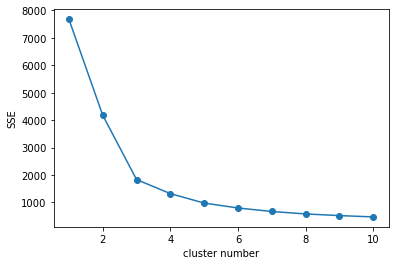

In [16]:
points = X_train.values

# 그래프에서 가장 급격하게 꺽이는 지점의 x값이 올바른 k의 값
def elbow(x):
    sse = []
    for i in range(1,11):
        km=REAL_Kmeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('cluster number')
    plt.ylabel('SSE')
    plt.show()

elbow(points)

In [17]:
REAL_kmeans = REAL_Kmeans(n_clusters=3).fit(X_train)
#REAL_kmeans.cluster_centers_
X_train['cluster']=REAL_kmeans.labels_
X_train.head()

C:\Users\csh\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,BTH_YR,GENDER,SCTR_CD,LN_AMT,cluster
0,0.617284,0.5,0.030612,0.027778,2
1,0.604938,1.0,0.010204,0.001944,1
2,0.604938,1.0,0.081633,0.002778,1
3,0.456790,1.0,0.010204,0.011111,1
4,0.358025,0.5,0.214286,0.001722,2


In [18]:
predict_1 = REAL_kmeans.predict(X_test)

In [19]:
def recommend(x):# x는 예측된 결과 데이터
    array= []
    for i in range(len(X_train)):
        if x[0] == X_train['cluster'][i]:
            array.append(y_train['LN_CD_2'][i])
    result = Counter(array)
    i = 0
    a = 0
    for key in result:
        if i < result[key] :
            i = result[key]
            a = key
        print(key,':' ,result[key],"명")
    print("")
    print("추천상품: "+ str(a))
    print("고객님과 비슷한 수입, 나이대의 사람이 이 대출 상품을 "+str(i)+" 명 사용합니다.")

In [20]:
recommend(predict_1)

200 : 834 명
100 : 6384 명
240 : 1156 명
0 : 7908 명
270 : 365 명
220 : 3410 명
230 : 764 명
245 : 49 명
500 : 809 명
590 : 125 명
510 : 237 명
710 : 41 명
290 : 257 명
210 : 91 명
170 : 11 명
250 : 122 명
150 : 14 명
700 : 18 명
271 : 5 명

추천상품: 0
고객님과 비슷한 수입, 나이대의 사람이 이 대출 상품을 7908 명 사용합니다.


- k-means 수행 후 5차원 그래프 표현
 - 지금까지 한 4차원 그래프에 label을 색깔로 표현

In [21]:
# k-means 수행 후 label을 추가한 5차원 그래프

markercolor = X_train['cluster']
markershape = X_train['GENDER'].replace(0.5,"square").replace(1,"circle")

#Make Plotly figure
fig1 = go.Scatter3d(x=X_train['LN_AMT'],
                    y=X_train['BTH_YR'],
                    z=X_train['SCTR_CD'],
                    marker=dict(
                                size = 3,
                                color=markercolor,
                                symbol=markershape,
                                opacity=0.9,
                                reversescale=True,
                                colorscale="Viridis",  
                                #line=dict(color = 'gray', width=50)
                    ),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="loan_amt"),
                                yaxis=dict( title="birth_year"),
                                zaxis=dict(title="sctr_cd")),
                    width = 1000, height= 800,)

#Plot and save html
plotly.offline.iplot({"data": [fig1],
                     "layout": mylayout})

### 6. Differential Privacy k-means 예측

In [22]:
X_train.drop(['cluster'], axis='columns', inplace=True)
X_train

C:\Users\csh\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,BTH_YR,GENDER,SCTR_CD,LN_AMT
0,0.617284,0.5,0.030612,0.027778
1,0.604938,1.0,0.010204,0.001944
2,0.604938,1.0,0.081633,0.002778
3,0.456790,1.0,0.010204,0.011111
4,0.358025,0.5,0.214286,0.001722
...,...,...,...,...
57671,0.271605,1.0,0.030612,0.001889
57672,0.753086,1.0,0.173469,0.003556
57673,0.617284,0.5,0.010204,0.016667
57674,0.592593,0.5,0.030612,0.016667


In [23]:
DP_kmeans = DP_KMeans(epsilon=epsilon,n_clusters=3).fit(X_train)
#DP_kmeans.cluster_centers_
X_train['cluster'] = DP_kmeans.labels_
X_train.head()

C:\Users\csh\Anaconda3\envs\tensorflow\lib\site-packages\diffprivlib\models\k_means.py:131: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `bounds` for each dimension.
  "privacy leakage, specify `bounds` for each dimension.", PrivacyLeakWarning)
C:\Users\csh\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,BTH_YR,GENDER,SCTR_CD,LN_AMT,cluster
0,0.617284,0.5,0.030612,0.027778,2
1,0.604938,1.0,0.010204,0.001944,2
2,0.604938,1.0,0.081633,0.002778,2
3,0.456790,1.0,0.010204,0.011111,2
4,0.358025,0.5,0.214286,0.001722,2


In [24]:
predict_2=DP_kmeans.predict(X_test)
print("dp 적용한 test 값의 적절한 label은 "+str(predict_2[0])+" 입니다.")

dp 적용한 test 값의 적절한 label은 2 입니다.


In [25]:
recommend(predict_2)

230 : 1912 명
200 : 1814 명
100 : 17133 명
240 : 3096 명
0 : 15672 명
270 : 1006 명
220 : 8255 명
245 : 170 명
500 : 2601 명
210 : 235 명
590 : 303 명
250 : 328 명
510 : 792 명
150 : 41 명
700 : 64 명
710 : 123 명
290 : 696 명
170 : 30 명
271 : 12 명

추천상품: 100
고객님과 비슷한 수입, 나이대의 사람이 이 대출 상품을 17133 명 사용합니다.


- DP k-means 수행 후 5차원 그래프 표현
 - 지금까지 한 4차원 그래프에 label을 색깔로 표현

In [26]:
# DP k-means 수행 후 label을 추가한 5차원 그래프

markercolor = X_train['cluster']
markershape = X_train['GENDER'].replace(0.5,"square").replace(1,"circle")

#Make Plotly figure
fig1 = go.Scatter3d(x=X_train['LN_AMT'],
                    y=X_train['BTH_YR'],
                    z=X_train['SCTR_CD'],
                    marker=dict(
                                size = 3,
                                color=markercolor,
                                symbol=markershape,
                                opacity=0.9,
                                reversescale=True,
                                colorscale="Viridis",  
                                #line=dict(color = 'gray', width=50)
                    ),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="loan_amt"),
                                yaxis=dict( title="birth_year"),
                                zaxis=dict(title="sctr_cd")),
                    width = 1000, height= 800,)

#Plot and save html
plotly.offline.iplot({"data": [fig1],
                     "layout": mylayout})

### 7. 결과값 비교

In [27]:
recommend(predict_1)

710 : 5 명
0 : 57 명
220 : 47 명
100 : 229 명
500 : 74 명
240 : 20 명
230 : 51 명
200 : 16 명
290 : 24 명
590 : 9 명
700 : 1 명
210 : 11 명
510 : 14 명
270 : 2 명
150 : 3 명
245 : 3 명
271 : 1 명

추천상품: 100
고객님과 비슷한 수입, 나이대의 사람이 이 대출 상품을 229 명 사용합니다.


In [28]:
recommend(predict_2)

230 : 1912 명
200 : 1814 명
100 : 17133 명
240 : 3096 명
0 : 15672 명
270 : 1006 명
220 : 8255 명
245 : 170 명
500 : 2601 명
210 : 235 명
590 : 303 명
250 : 328 명
510 : 792 명
150 : 41 명
700 : 64 명
710 : 123 명
290 : 696 명
170 : 30 명
271 : 12 명

추천상품: 100
고객님과 비슷한 수입, 나이대의 사람이 이 대출 상품을 17133 명 사용합니다.


### 8. k-익명성, l- 다양성 적용

In [29]:
# k-익명성

# 나이와 성별을 준식별자로 두고 나이의 범주화를 통해서 나이와 성별이 동일한 컬럼인 k값을 구해본다.

In [30]:
# l-다양성

# 나이와 성별을 준식별자로 두고 나이의 범주화를 통해서 k값을 구한 후, 업권코드와 대출금액을 민감정보로 지정한다.
# 대출금액의 범주화나 라운딩(반올림) 등을 통하여 같은 k 익명성 적용 행들 중 얼마나 다양한 l값이 존재하는지 확인해본다.

### 9. 시각화 예시 코드 (위에 두기 거슬려서 밑에 둡니다.)

In [31]:
# 3차원 , 성별(네모, 세모), 색깔 (클러스터링 레이블)

#markercolor = X['GENDER']

#p = X
#sns.pairplot(p)

markershape = year_df_temp['GENDER'].replace(1,"square").replace(2,"circle")

#Make Plotly figure
fig1 = go.Scatter3d(x=year_df_temp['LN_AMT'],
                    y=year_df_temp['BTH_YR'],
                    z=year_df_temp['SCTR_CD'],
                    marker=dict(symbol=markershape,
                                opacity=0.9,
                                reversescale=True,
                                colorscale='Blues'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title='LN_AMT'),
                                yaxis=dict( title='BTH_YR'),
                                zaxis=dict(title='SCTR_CD')),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("정규화 전 Data (4차원).html"))

ValueError: 
    Invalid element(s) received for the 'symbol' property of scatter3d.marker
        Invalid elements include: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

    The 'symbol' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['circle', 'circle-open', 'square', 'square-open',
            'diamond', 'diamond-open', 'cross', 'x']
      - A tuple, list, or one-dimensional numpy array of the above

In [ ]:
# 3차원 , 성별(네모, 세모), 색깔 (클러스터링 레이블)

markercolor = X_train['cluster']
markershape = X_train['GENDER'].replace(0.5,"square").replace(1,"circle")

#Make Plotly figure
fig1 = go.Scatter3d(x=X_train['LN_AMT'],
                    y=X_train['SCTR_CD'],
                    z=X_train['BTH_YR'],
                    marker=dict(symbol=markershape,
                                opacity=0.9,
                                color=markercolor,
                                reversescale=True,
                                colorscale='Blues'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title='LN_AMT'),
                                yaxis=dict( title='BTH_YR'),
                                zaxis=dict(title='SCTR_CD')),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("클러스터링 후 5DPlot.html"))